### Installing scalecast, prophet libraries and importing needed packages

In [ ]:
# Skip installation if you have already install phrphet and scalecast
!pip install scalecast
!pip install prophet

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster
sns.set(rc={'figure.figsize':(25,16)})


### Loading energy.dat and storing it in a dataframe

In [ ]:
dat_file = r"energy.dat"

with open(dat_file, 'r') as file:
    text = file.read()

# Splitting dataset into dates and energy consumption and storing it in a dictionary
dict_data = { i.split(',')[0] : float(i.split(',')[1]) for i in text.splitlines()[1:] }

data = pd.DataFrame(dict_data.values(), index=dict_data.keys())
data['date'] = pd.to_datetime(data.index)

data.columns = ['consumption', 'date']
data.head()


### Seasonality and trend evaulation of the time series data

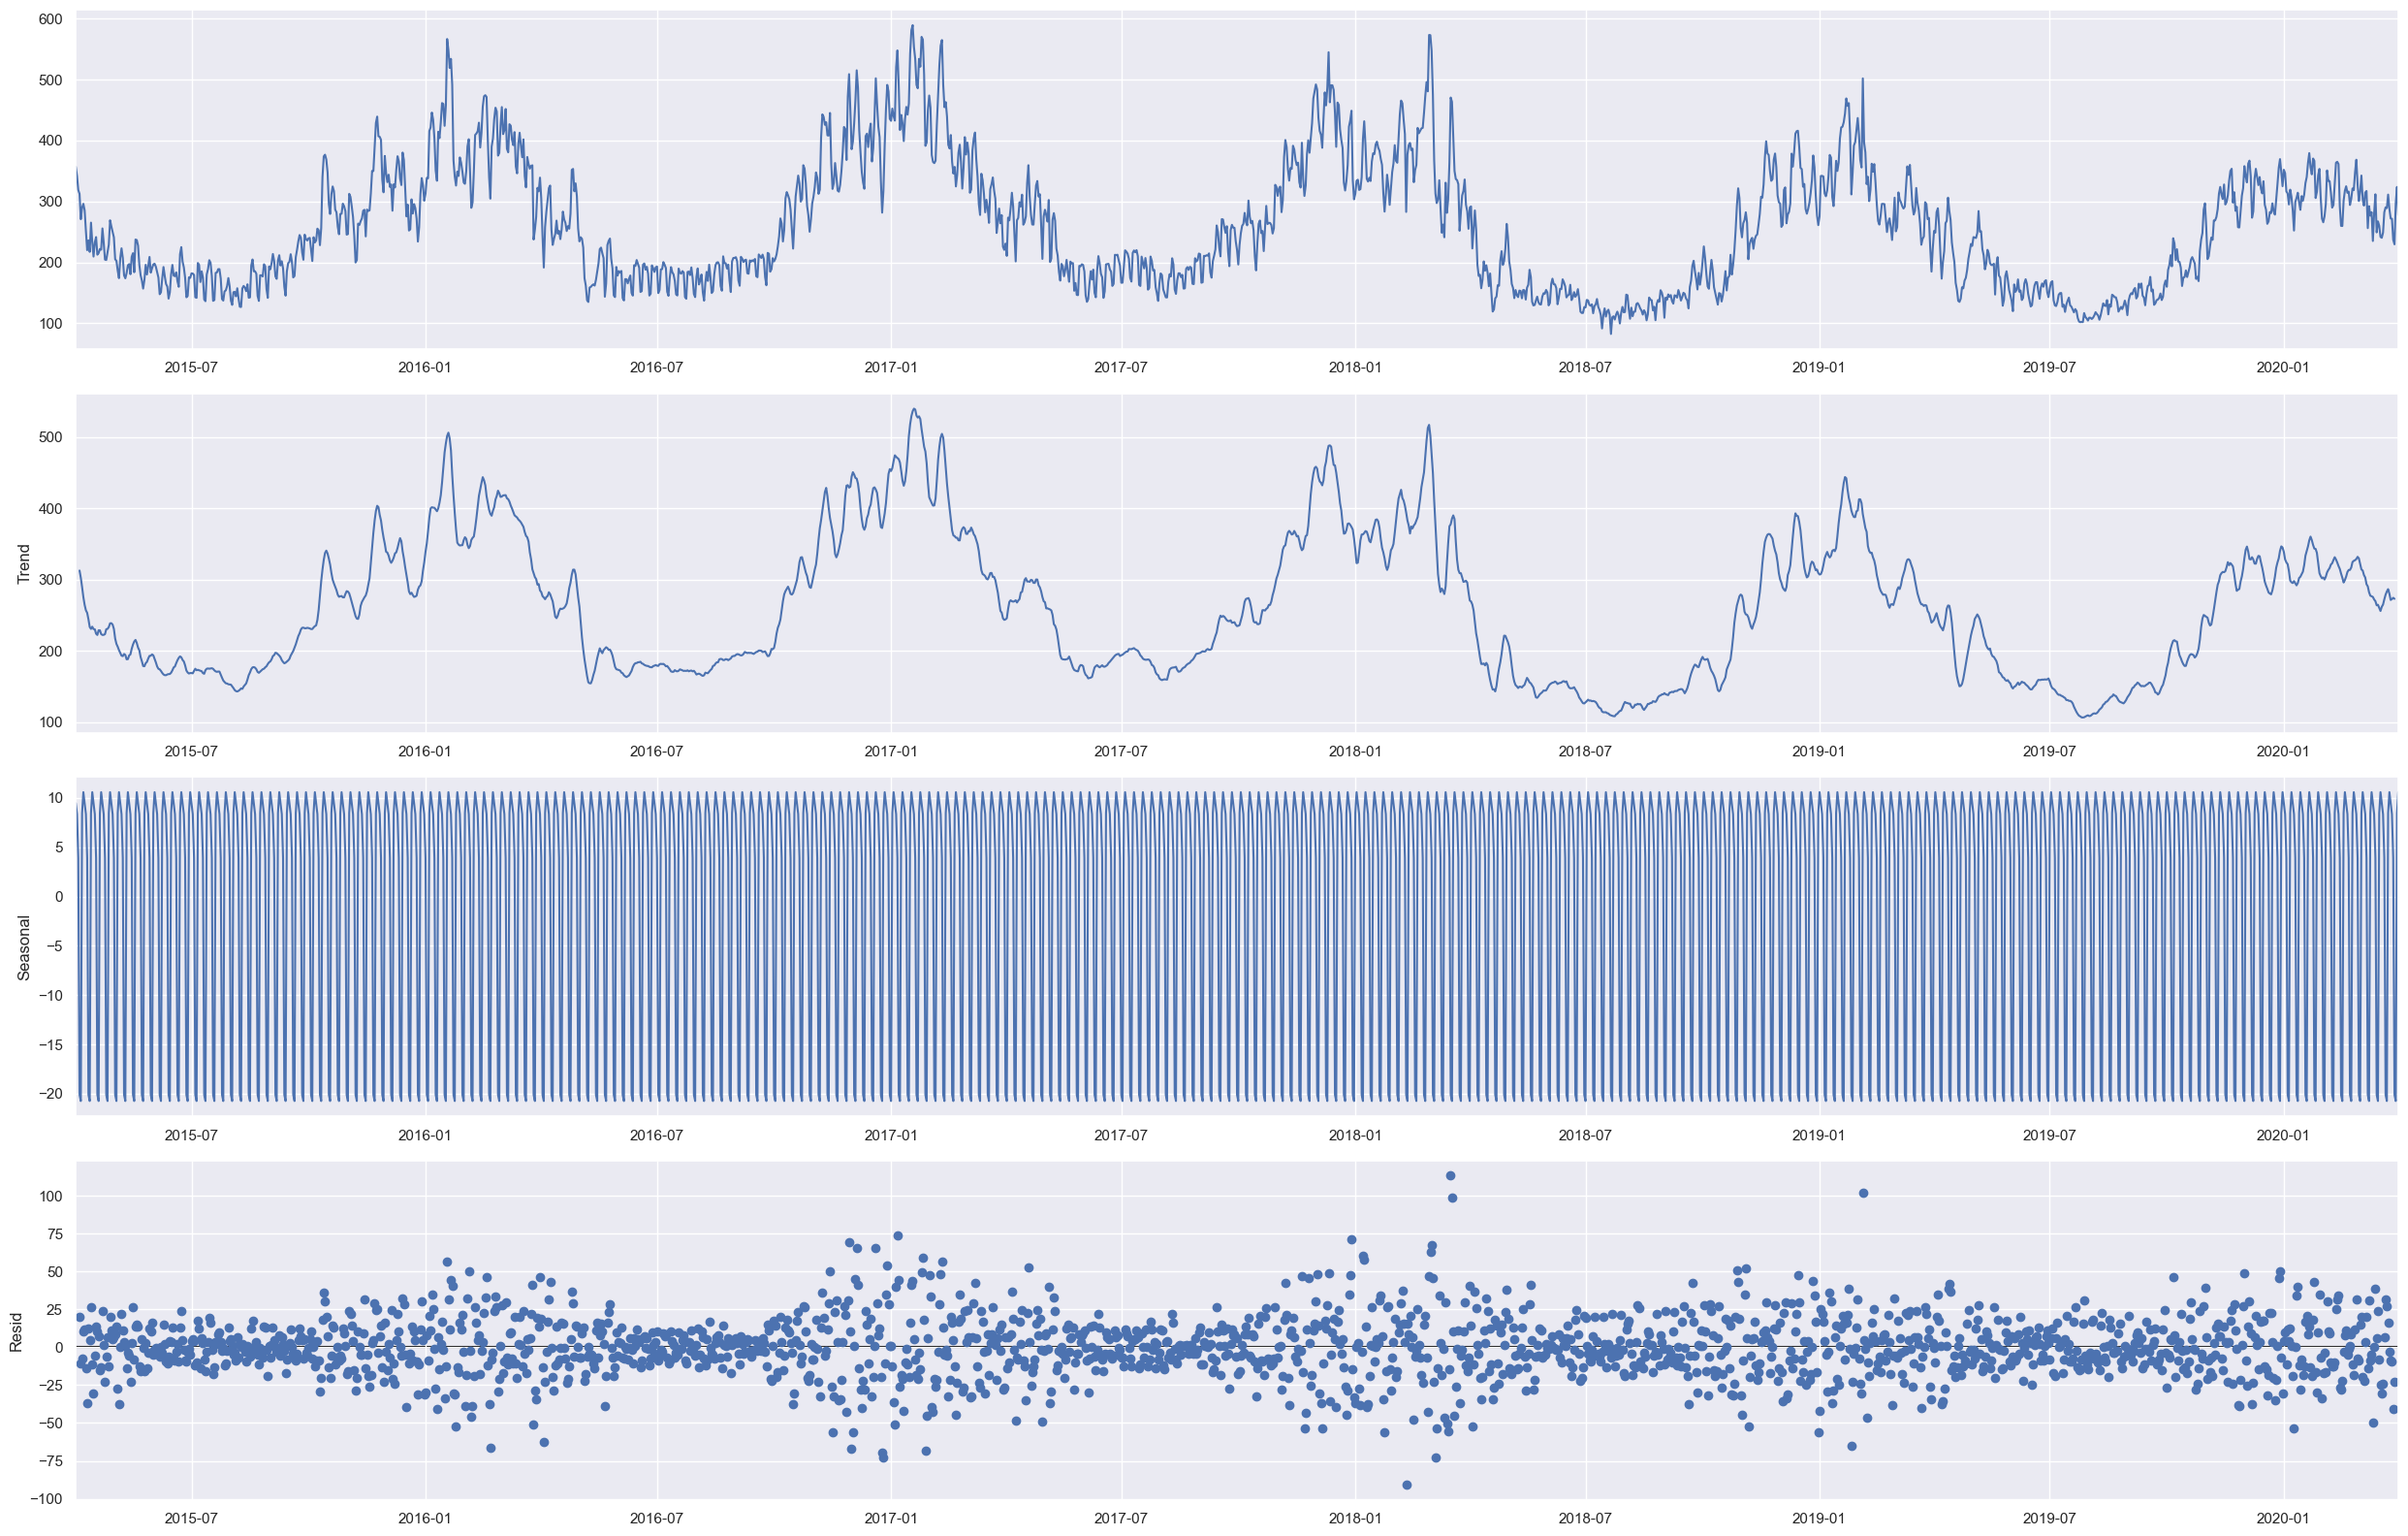

In [7]:
# To begin forecasting with scalecast, we must first call the Forecaster object
# with the energy consumption data with corresponding dates
val = data['consumption'].values

# initializing the forecaster with energy consumption data with corresponding dates
f = Forecaster(val, current_dates=data['date'])
f.seasonal_decompose().plot()

# plotting the data with corresponding dates to see the seasonality
plt.savefig('seasonal_plots.jpg')


### Forcast by MLR method

In [8]:
# mlr estimater has shown better accuracy after a series of studies with various available 
# models in scalecast. 
f.set_estimator('mlr')

# generating future dates for a whole year
f.generate_future_dates(365)

# adding auto-regression terms, after a carefull evaluation of the trend and seasonlity graphs above
# 24 months is selected for the AR value.
f.add_ar_terms(24)

# adding seasonality to the forecaster
f.add_seasonal_regressors('month','quarter',dummy=True)
f.add_seasonal_regressors('year')

# adding trend to the forecaster
f.add_time_trend()


<AxesSubplot: xlabel='Date', ylabel='Values'>

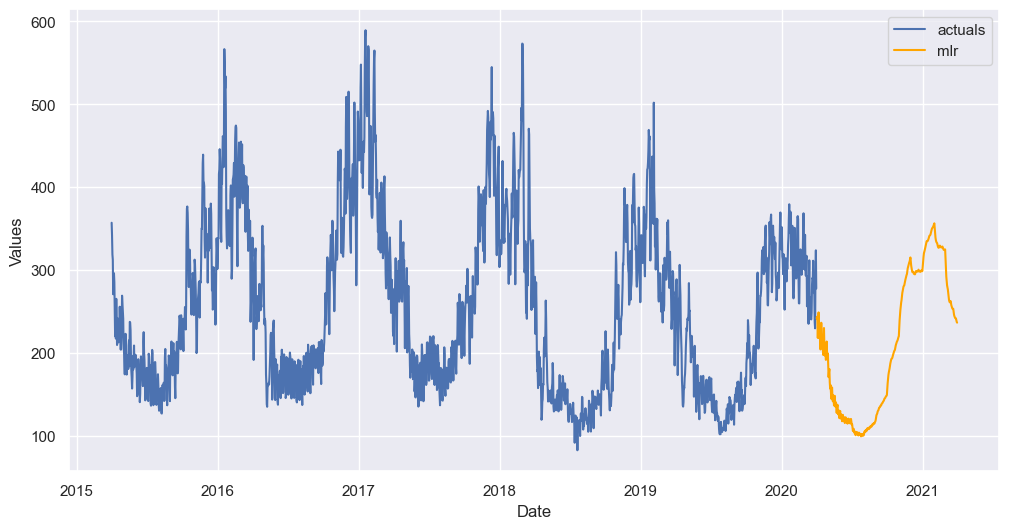

In [9]:
# running the forecaster and plot the results
f.manual_forecast()
f.plot()


### Forcast by Prophet method

09:57:01 - cmdstanpy - INFO - Chain [1] start processing
09:57:02 - cmdstanpy - INFO - Chain [1] done processing
09:57:03 - cmdstanpy - INFO - Chain [1] start processing
09:57:03 - cmdstanpy - INFO - Chain [1] done processing


<AxesSubplot: xlabel='Date', ylabel='Values'>

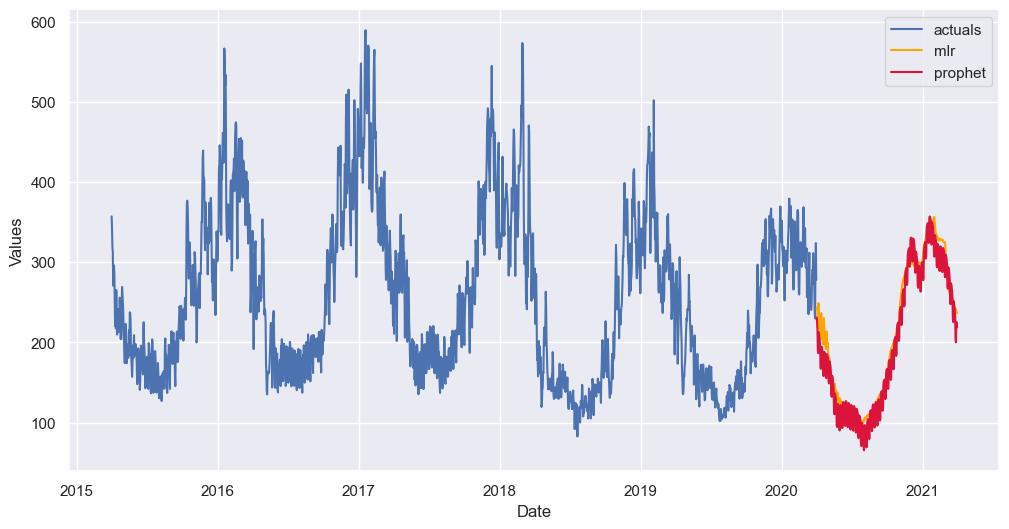

In [10]:
# phorphet is used by facebook for times series forecasting and has shown to be relatively accurate in many ts 
# problems. Here it has been used as a benchmark against the tuned mlr model.
f.set_estimator('prophet')
f.generate_future_dates(365)
f.add_ar_terms(24)
f.add_seasonal_regressors('month','quarter',dummy=True)
f.add_seasonal_regressors('year')
f.add_time_trend()
f.manual_forecast()
f.plot()


### Model comparison

In [11]:
# producing a matrix for the above models
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]


,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,mlr,0.095804,26.616500,NaN,True
1,prophet,0.154119,42.817609,NaN,False
